In [2]:
%pip install plotly

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.8 MB 6.7 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.8 MB 7.0 MB/s eta 0:00:01
   ------------------ --------------------- 4.5/9.8 MB 7.3 MB/s eta 0:00:01
   ------------------------ --------------- 6.0/9.8 MB 7.4 MB/s eta 0:00:01
   ------------------------------- -------- 7.9/9.8 MB 7.4 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.8 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 7.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Analisi Esplorativa Avanzata del Dataset GUIDE

Questo notebook contiene un'analisi dettagliata del dataset GUIDE, focalizzandosi su:

1. Correlazioni tra attributi
2. Distribuzione del rischio (Risk)
3. Analisi delle categorie (AlertTitle, IncidentGrade)
4. Analisi temporale dei dati
5. Pattern settimanali
6. Altre analisi rilevanti

In [15]:
# Importazione delle librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Impostazioni di visualizzazione
sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = [12, 8]

# Caricamento del dataset
df = pd.read_csv('../data/GUIDE_Train.csv')

print("Dimensioni del dataset:", df.shape)
print("\nPrime righe del dataset:")
display(df.head())

Dimensioni del dataset: (9516837, 45)

Prime righe del dataset:


,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,NaN,NaN,Ip,Related,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,22406,23032,22795,24887,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,NaN,NaN,Url,Related,98799,138268,360606,68652,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Url,Related,98799,138268,360606,13,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,449,592,440,479,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


## Analisi delle Correlazioni

Analizziamo le correlazioni tra le variabili numeriche del dataset, con particolare attenzione alla colonna Risk.

Colonne nel dataset:
['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId', 'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade', 'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId', 'EmailClusterId', 'RegistryKey', 'RegistryValueName', 'RegistryValueData', 'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath', 'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode', 'State', 'City']


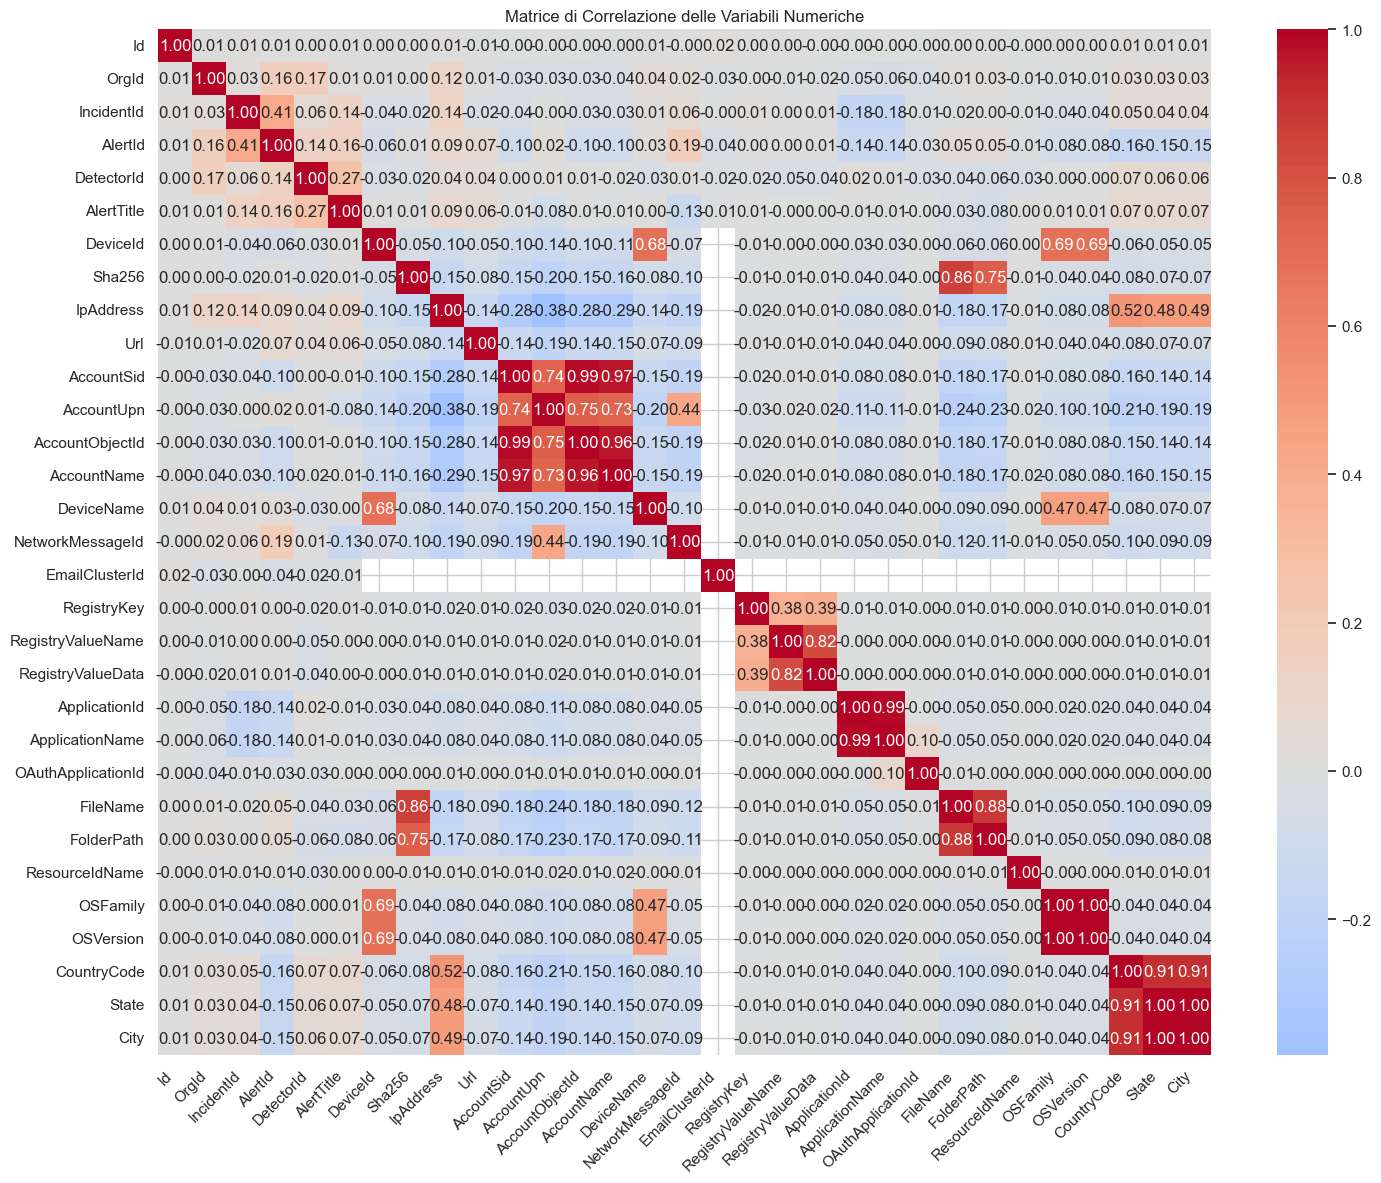


Correlazioni più significative:

Id:
Id                1.000000
EmailClusterId    0.018048
IncidentId        0.014532
Name: Id, dtype: float64

OrgId:
OrgId         1.000000
DetectorId    0.166280
AlertId       0.164287
Name: OrgId, dtype: float64

IncidentId:
IncidentId    1.000000
AlertId       0.413221
AlertTitle    0.137387
Name: IncidentId, dtype: float64

AlertId:
AlertId             1.000000
IncidentId          0.413221
NetworkMessageId    0.188167
Name: AlertId, dtype: float64

DetectorId:
DetectorId    1.000000
AlertTitle    0.266043
OrgId         0.166280
Name: DetectorId, dtype: float64

AlertTitle:
AlertTitle    1.000000
DetectorId    0.266043
AlertId       0.162036
Name: AlertTitle, dtype: float64

DeviceId:
DeviceId     1.000000
OSVersion    0.685773
OSFamily     0.685214
Name: DeviceId, dtype: float64

Sha256:
Sha256        1.000000
FileName      0.864038
FolderPath    0.751188
Name: Sha256, dtype: float64

IpAddress:
IpAddress      1.000000
CountryCode    0.520046
City

In [16]:
# Visualizziamo le colonne disponibili
print("Colonne nel dataset:")
print(df.columns.tolist())

# Selezione delle colonne numeriche
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Creazione della heatmap delle correlazioni
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice di Correlazione delle Variabili Numeriche')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Stampa delle correlazioni più significative
print("\nCorrelazioni più significative:")
for col in numeric_cols:
    top_corr = correlation_matrix[col].sort_values(ascending=False)[:3]
    print(f"\n{col}:")
    print(top_corr)

## Analisi della Distribuzione delle Categorie

Analizziamo la distribuzione delle colonne categoriche principali: AlertTitle e IncidentGrade.

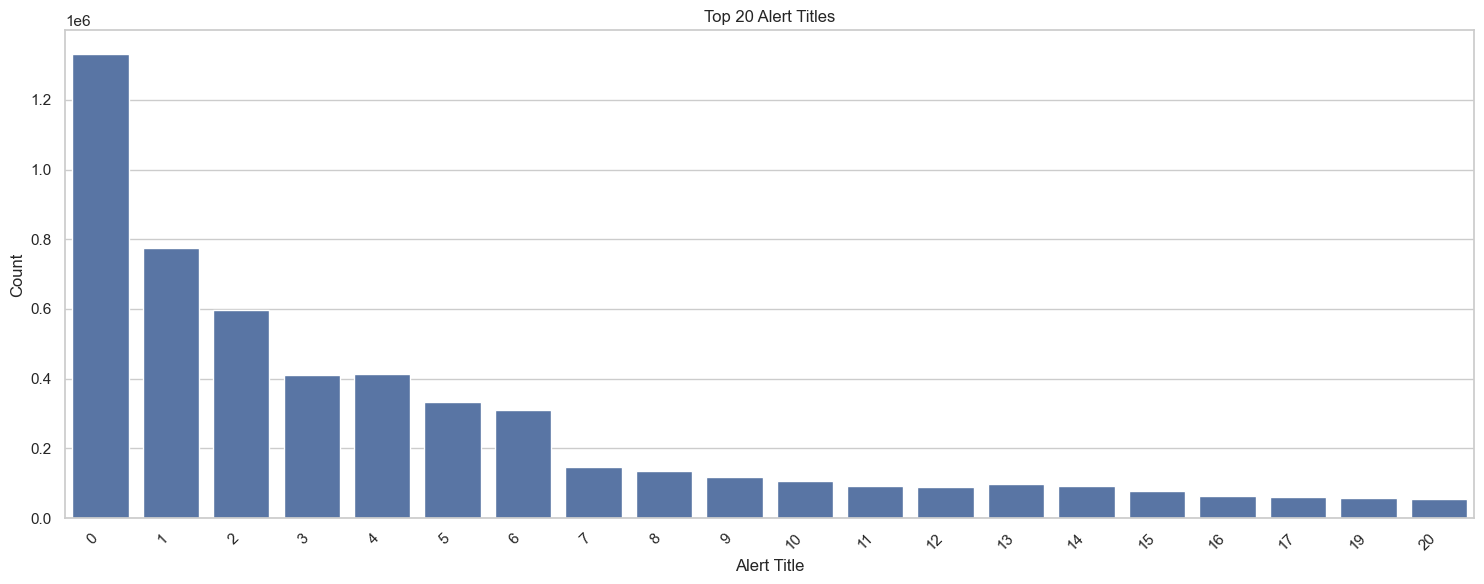

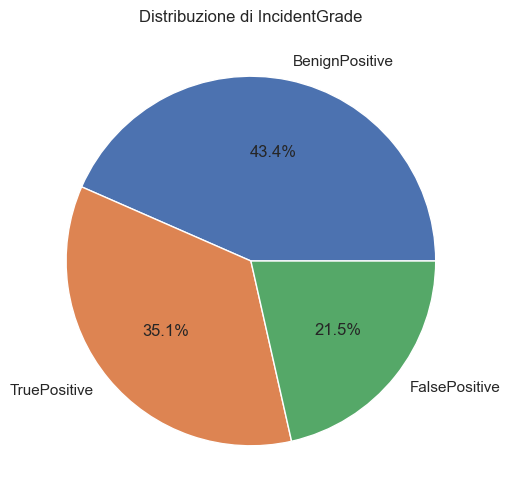


Statistiche dettagliate:

AlertTitle - Top 10:
AlertTitle
0    1332232
1     774539
2     597497
4     413879
3     412087
5     334652
6     309093
7     145547
8     135410
9     117799
Name: count, dtype: int64

IncidentGrade:
IncidentGrade
BenignPositive    4110817
TruePositive      3322713
FalsePositive     2031967
Name: count, dtype: int64


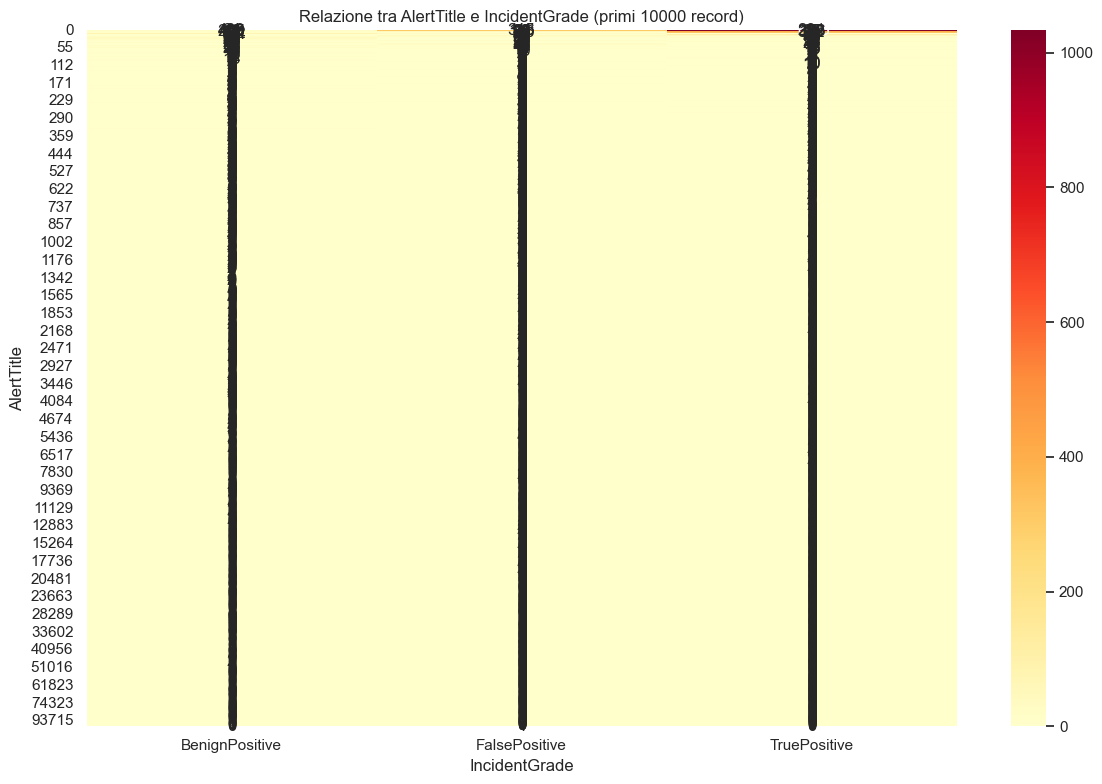

In [17]:
# Analisi di AlertTitle
plt.figure(figsize=(15, 6))
alert_counts = df['AlertTitle'].value_counts()
sns.barplot(x=alert_counts.index[:20], y=alert_counts.values[:20])
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Alert Titles')
plt.xlabel('Alert Title')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Analisi di IncidentGrade
plt.figure(figsize=(10, 6))
incident_counts = df['IncidentGrade'].value_counts()
plt.pie(incident_counts, labels=incident_counts.index, autopct='%1.1f%%')
plt.title('Distribuzione di IncidentGrade')
plt.show()

# Tabella con statistiche complete
print("\nStatistiche dettagliate:")
print("\nAlertTitle - Top 10:")
print(alert_counts.head(10))
print("\nIncidentGrade:")
print(incident_counts)

# Analisi della relazione tra AlertTitle e IncidentGrade
alert_incident = pd.crosstab(df['AlertTitle'].head(10000), df['IncidentGrade'])
plt.figure(figsize=(12, 8))
sns.heatmap(alert_incident, cmap='YlOrRd', fmt='d', annot=True)
plt.title('Relazione tra AlertTitle e IncidentGrade (primi 10000 record)')
plt.xlabel('IncidentGrade')
plt.ylabel('AlertTitle')
plt.tight_layout()
plt.show()

## Analisi Temporale

Analizziamo i pattern temporali nel dataset, inclusi trend giornalieri e settimanali.

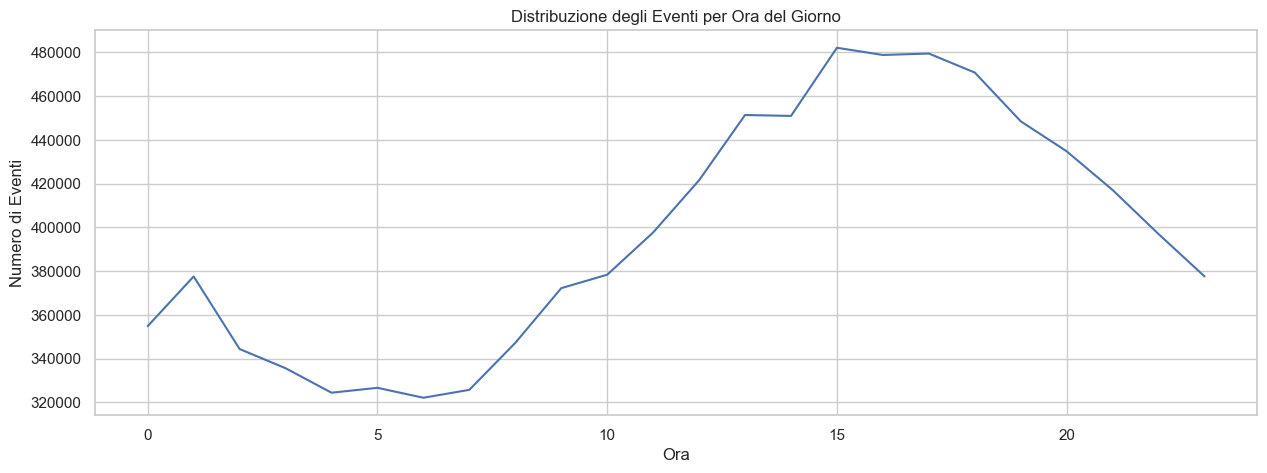

<Figure size 1500x600 with 0 Axes>

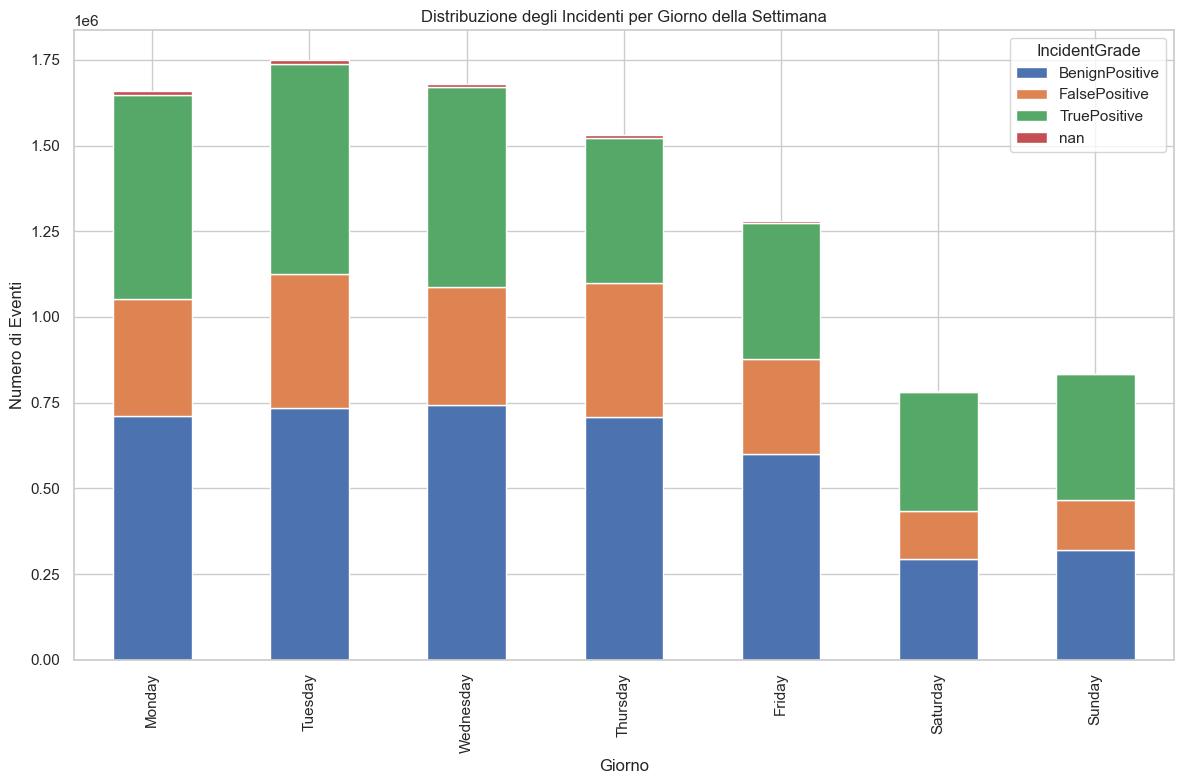

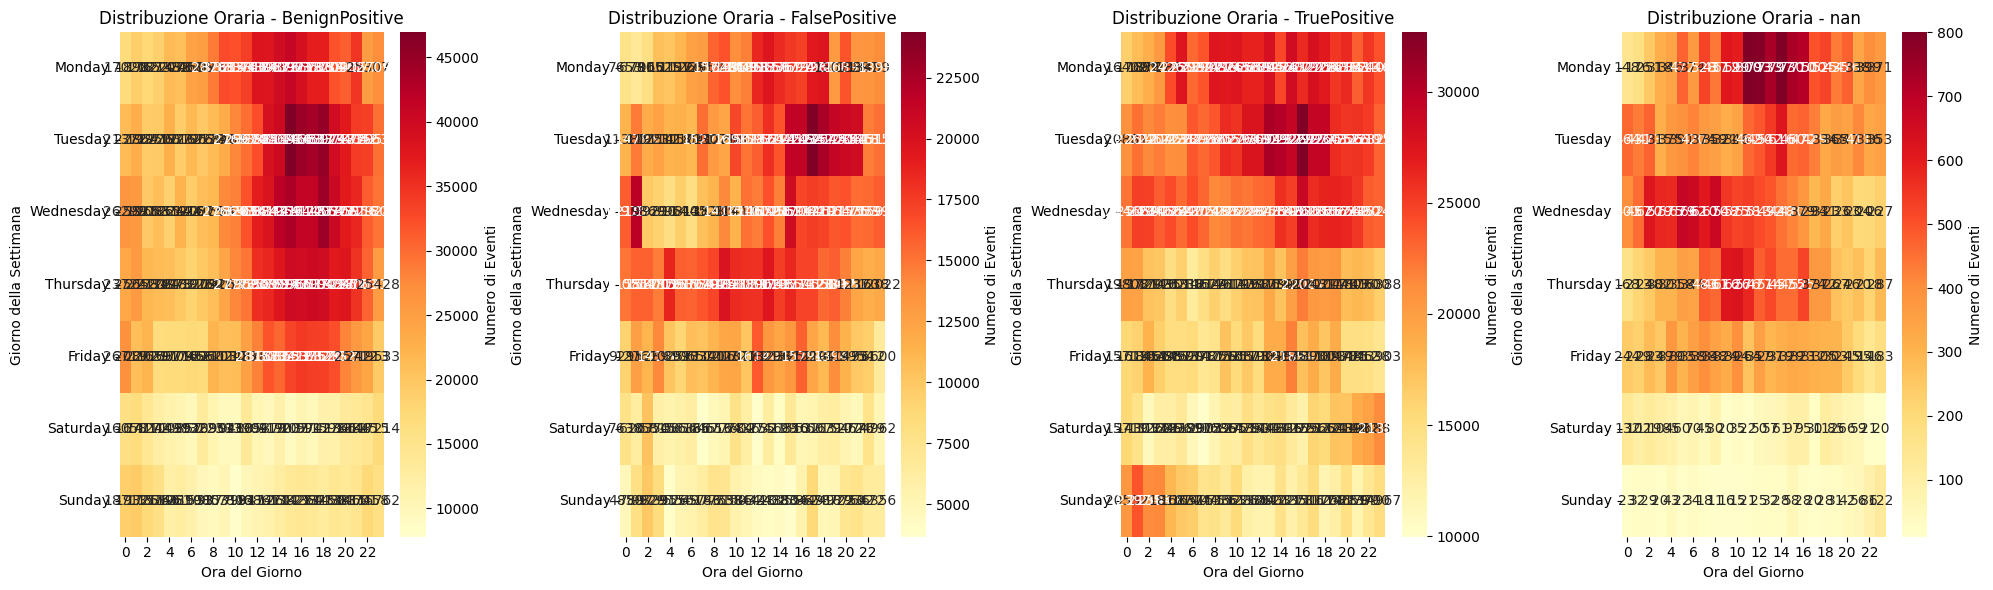


Statistiche Temporali:

Media eventi per ora: 396534
Ora più attiva: 15 con 482147 eventi
Ora meno attiva: 6 con 322094 eventi

Media eventi per giorno: 1359548
Giorno più attivo: Tuesday con 1748603 eventi
Giorno meno attivo: Saturday con 783065 eventi

Media eventi per giorno: 1359548
Giorno più attivo: Tuesday con 1748603 eventi
Giorno meno attivo: Saturday con 783065 eventi


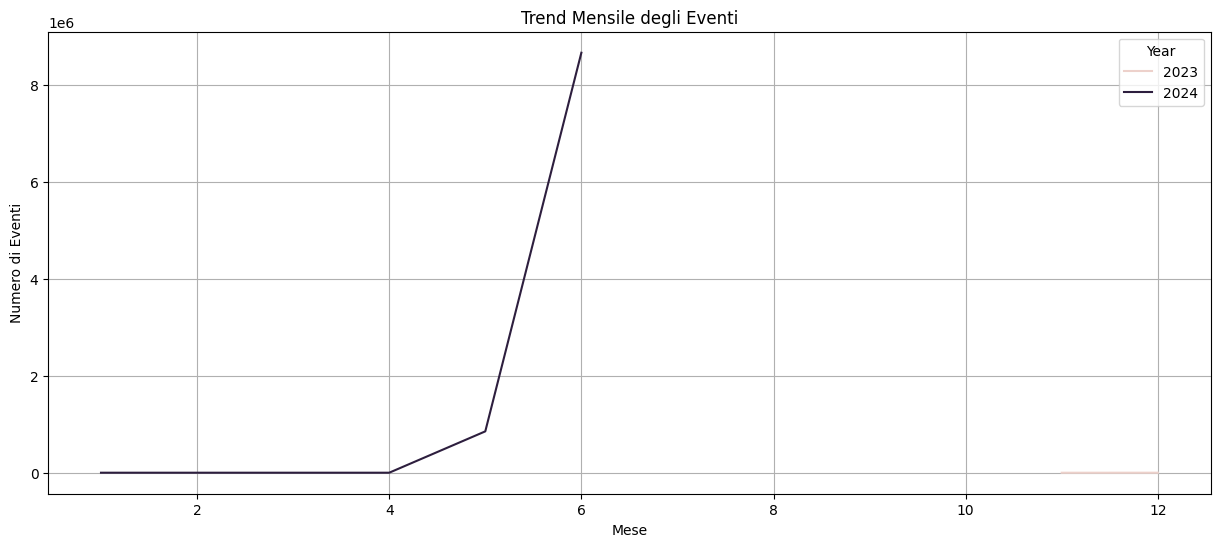

In [18]:
# Conversione della colonna Timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.day_name()
df['Date'] = df['Timestamp'].dt.date
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

# Assicuriamoci che IncidentGrade sia di tipo stringa
df['IncidentGrade'] = df['IncidentGrade'].astype(str)

# Analisi per ora del giorno
plt.figure(figsize=(15, 5))
hourly_counts = df.groupby('Hour').size()
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values)
plt.title('Distribuzione degli Eventi per Ora del Giorno')
plt.xlabel('Ora')
plt.ylabel('Numero di Eventi')
plt.grid(True)
plt.show()

# Analisi per giorno della settimana e tipo di incidente
plt.figure(figsize=(15, 6))
day_grade = pd.crosstab(df['DayOfWeek'], df['IncidentGrade'])
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_grade = day_grade.reindex(day_order)
day_grade.plot(kind='bar', stacked=True)
plt.title('Distribuzione degli Incidenti per Giorno della Settimana')
plt.xlabel('Giorno')
plt.ylabel('Numero di Eventi')
plt.legend(title='IncidentGrade')
plt.tight_layout()
plt.show()

# Heatmap ora-giorno per ogni tipo di incidente
plt.style.use('default')  # Reset style
incident_types = sorted(df['IncidentGrade'].unique())
fig, axes = plt.subplots(1, len(incident_types), figsize=(20, 6))

for i, incident_type in enumerate(incident_types):
    subset = df[df['IncidentGrade'] == incident_type]
    pivot = pd.crosstab(subset['DayOfWeek'], subset['Hour'])
    pivot = pivot.reindex(day_order)
    
    sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt='d', ax=axes[i], cbar_kws={'label': 'Numero di Eventi'})
    axes[i].set_title(f'Distribuzione Oraria - {incident_type}')
    axes[i].set_xlabel('Ora del Giorno')
    axes[i].set_ylabel('Giorno della Settimana')

plt.tight_layout()
plt.show()

# Statistiche temporali
print("\nStatistiche Temporali:")
print("\nMedia eventi per ora:", int(hourly_counts.mean()))
print("Ora più attiva:", hourly_counts.idxmax(), "con", hourly_counts.max(), "eventi")
print("Ora meno attiva:", hourly_counts.idxmin(), "con", hourly_counts.min(), "eventi")

daily_counts = df.groupby('DayOfWeek').size().reindex(day_order)
print("\nMedia eventi per giorno:", int(daily_counts.mean()))
print("Giorno più attivo:", daily_counts.idxmax(), "con", daily_counts.max(), "eventi")
print("Giorno meno attivo:", daily_counts.idxmin(), "con", daily_counts.min(), "eventi")

# Analisi mensile
monthly_counts = df.groupby(['Year', 'Month']).size().reset_index(name='count')
plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_counts, x='Month', y='count', hue='Year')
plt.title('Trend Mensile degli Eventi')
plt.xlabel('Mese')
plt.ylabel('Numero di Eventi')
plt.grid(True)
plt.show()

## Analisi della Distribuzione del Rischio

Analizziamo la distribuzione dei valori di Risk e la sua relazione con altre variabili chiave.

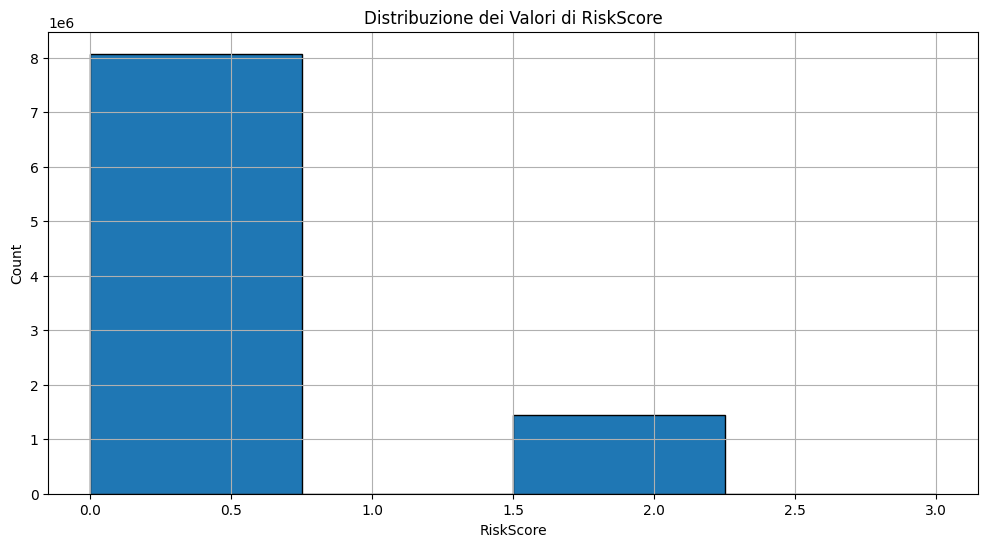

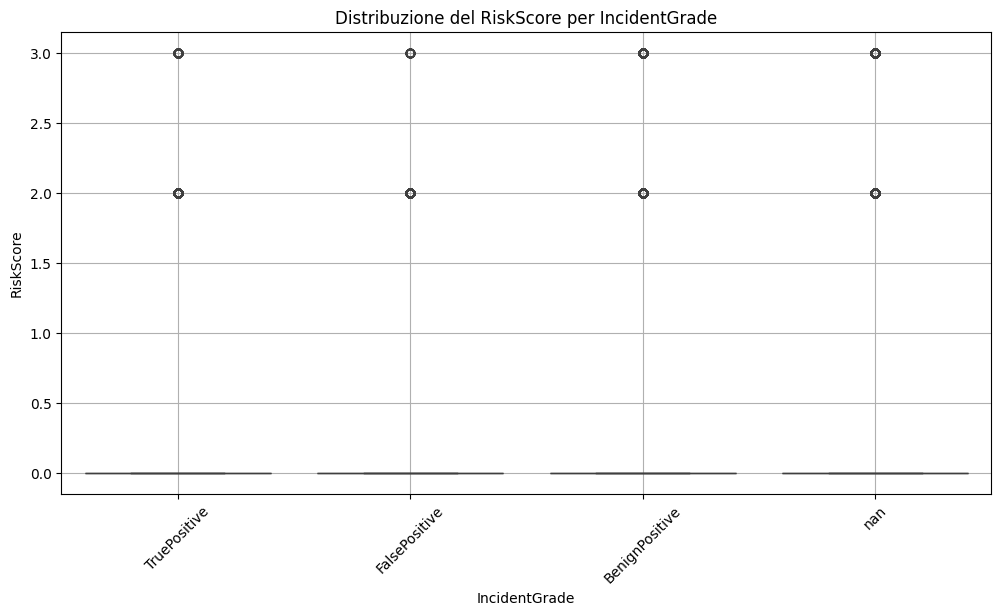

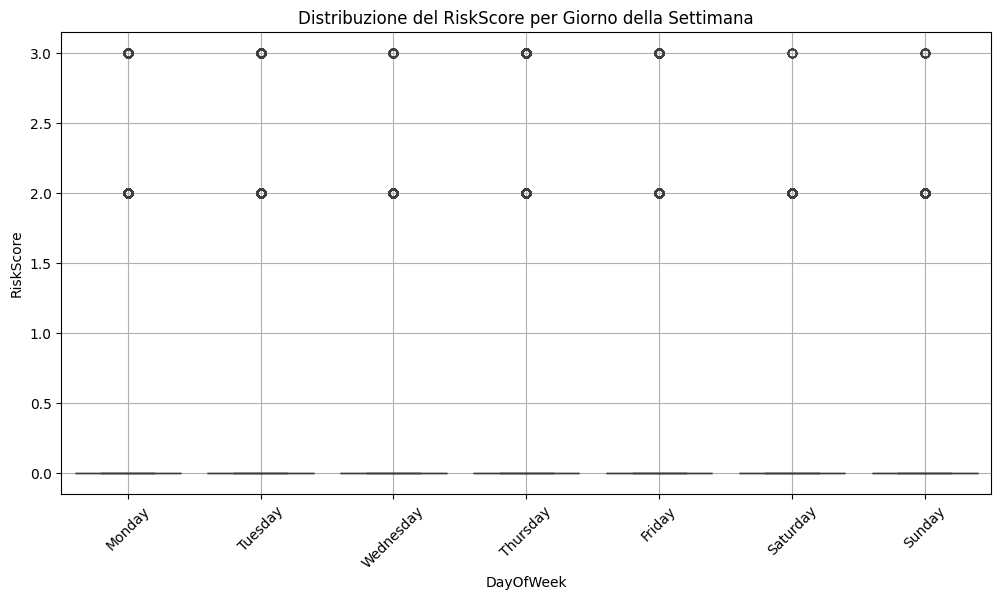

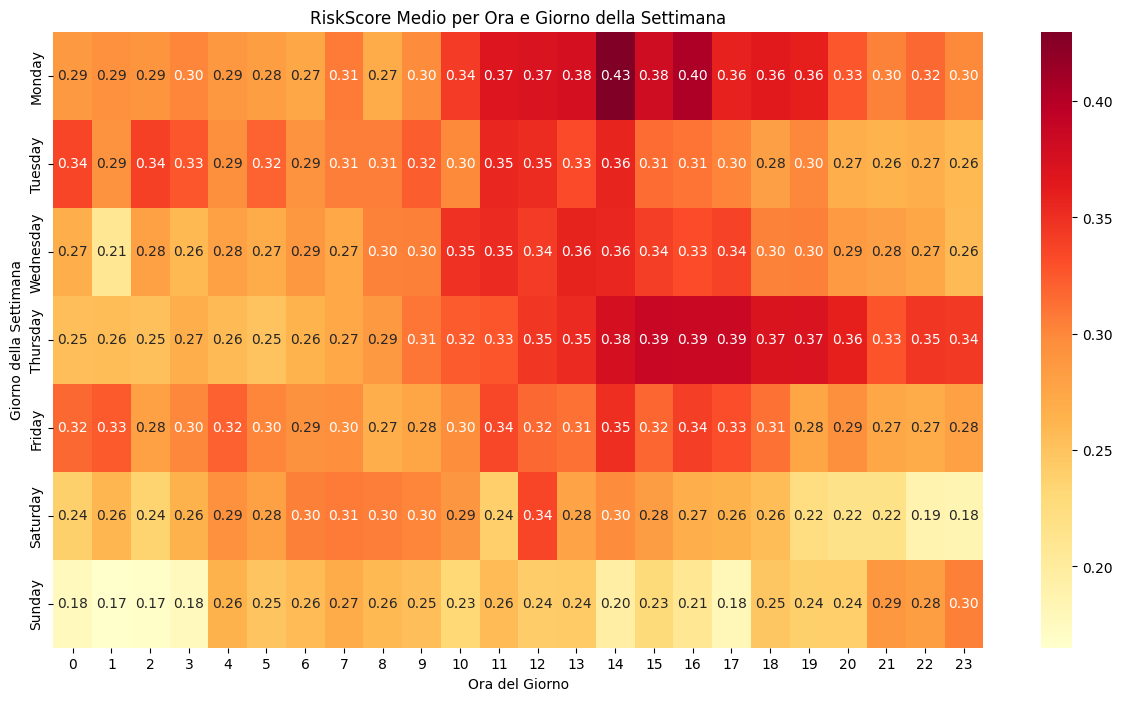


Statistiche del RiskScore:
count    9.516837e+06
mean     3.036485e-01
std      7.180335e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000000e+00
Name: RiskScore, dtype: float64
count    9.516837e+06
mean     3.036485e-01
std      7.180335e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000000e+00
Name: RiskScore, dtype: float64

RiskScore medio per IncidentGrade:
                 mean    std    count
IncidentGrade                        
BenignPositive  0.440  0.828  4110817
FalsePositive   0.218  0.623  2031967
TruePositive    0.188  0.584  3322713
nan             0.278  0.732    51340

Test statistico (Kruskal-Wallis H-test):

RiskScore medio per IncidentGrade:
                 mean    std    count
IncidentGrade                        
BenignPositive  0.440  0.828  4110817
FalsePositive   0.218  0.623  2031967
TruePositive    0.188  0.584  3322713
nan             0.278  0

In [21]:
# Calcolo del Risk Score basato sul SuspicionLevel
risk_mapping = {
    'Incriminated': 3,  # Highest risk
    'Suspicious': 2,    # Medium risk
    None: 0            # No suspicion
}

df['RiskScore'] = df['SuspicionLevel'].map(risk_mapping)
df['RiskScore'] = df['RiskScore'].fillna(0)

# Distribuzione generale del RiskScore
plt.figure(figsize=(12, 6))
plt.hist(df['RiskScore'], bins=4, edgecolor='black')
plt.title('Distribuzione dei Valori di RiskScore')
plt.xlabel('RiskScore')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Box plot del RiskScore per IncidentGrade
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='IncidentGrade', y='RiskScore')
plt.title('Distribuzione del RiskScore per IncidentGrade')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# RiskScore per giorno della settimana
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='DayOfWeek', y='RiskScore', order=day_order)
plt.title('Distribuzione del RiskScore per Giorno della Settimana')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Heatmap di RiskScore medio per ora e giorno
risk_pivot = df.pivot_table(
    values='RiskScore',
    index='DayOfWeek',
    columns='Hour',
    aggfunc='mean'
).reindex(day_order)

plt.figure(figsize=(15, 8))
sns.heatmap(risk_pivot, cmap='YlOrRd', annot=True, fmt='.2f')
plt.title('RiskScore Medio per Ora e Giorno della Settimana')
plt.xlabel('Ora del Giorno')
plt.ylabel('Giorno della Settimana')
plt.show()

# Statistiche del RiskScore
print("\nStatistiche del RiskScore:")
print(df['RiskScore'].describe())

# RiskScore medio per IncidentGrade
risk_by_grade = df.groupby('IncidentGrade')['RiskScore'].agg(['mean', 'std', 'count']).round(3)
print("\nRiskScore medio per IncidentGrade:")
print(risk_by_grade)

# Test statistico per differenze tra gruppi
from scipy import stats
print("\nTest statistico (Kruskal-Wallis H-test):")
groups = [group for _, group in df.groupby('IncidentGrade')['RiskScore']]
h_stat, p_val = stats.kruskal(*groups)
print(f"H-statistic: {h_stat:.2f}")
print(f"p-value: {p_val:.10f}")

# Percentuale di record con RiskScore > 0 per ogni IncidentGrade
print("\nPercentuale di record con RiskScore > 0 per ogni IncidentGrade:")
risk_percentage = df.groupby('IncidentGrade').apply(
    lambda x: (x['RiskScore'] > 0).mean() * 100
).round(2)
print(risk_percentage)